In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

In [2]:
# checking version of packages 

from packaging.version import parse as version
print(version(sns.__version__)>= version('0.9.0'))
print(version(np.__version__)>= version('0.15.4'))
print(version(pd.__version__)>= version('0.23.4'))

True
True
True


In [3]:
# reading data from folder 

df = pd.read_csv("D:\League Data\Sep-09-2022_10000matches.csv",low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      100001 non-null  int64 
 1   assists                         100001 non-null  int64 
 2   GameID                          100001 non-null  object
 3   GameMode                        100001 non-null  object
 4   baronKills                      100001 non-null  int64 
 5   bountyLevel                     100001 non-null  int64 
 6   champExperience                 100001 non-null  int64 
 7   champLevel                      100001 non-null  int64 
 8   championName                    100001 non-null  object
 9   damageDealtToObjectives         100001 non-null  int64 
 10  damageSelfMitigated             100001 non-null  int64 
 11  deaths                          100001 non-null  int64 
 12  dragonKills                   

In [5]:
df['win'] = df['win'].astype('int64')

In [6]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,0,0,0,0
assists,20,3,19,6,7
GameID,NA1_4430908515,4035079604,4035079604,4035079604,4035079604
GameMode,ARAM,CLASSIC,CLASSIC,CLASSIC,CLASSIC
baronKills,0,0,0,0,1
...,...,...,...,...,...
visionScore,5,10,21,8,3
visionWardsBoughtInGame,0,0,3,0,1
wardsKilled,0,0,0,0,1
wardsPlaced,0,7,11,5,2


In [7]:
df["GameMode"].unique()

array(['ARAM', 'CLASSIC'], dtype=object)

In [8]:
df.loc[df["GameMode"] == "ARAM"]

,Unnamed: 0,assists,GameID,GameMode,baronKills,bountyLevel,champExperience,champLevel,championName,damageDealtToObjectives,...,totalTimeSpentDead,trueDamageDealtToChampions,trueDamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,20,NA1_4430908515,ARAM,0,0,14531,15,Ashe,112,...,74,797,465,1,4,5,0,0,0,0


In [9]:
# since we have only 1 row of data for ARAM GameMode,we are going to delete this data for this project and 
# focus on CLASSIC GameMode only

df = df.drop(0)

In [10]:
df["Unnamed: 0"].unique()

array([0], dtype=int64)

In [11]:
# since Unnamed: 0 column is all 0, I'm dropping this column
df=df.drop(["Unnamed: 0"], axis = 1)

In [12]:
# checking for duplicates in df

df.duplicated().sum()


0

In [13]:
# check for nan/ missing values in columns

df.isnull().sum()

assists                    0
GameID                     0
GameMode                   0
baronKills                 0
bountyLevel                0
                          ..
visionScore                0
visionWardsBoughtInGame    0
wardsKilled                0
wardsPlaced                0
win                        0
Length: 68, dtype: int64

In [14]:
# check for total nan/missing values

df.isnull().values.sum()

0

In [15]:
df["individualPosition"].unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY', 'Invalid'],
      dtype=object)

In [16]:
df[["GameID","championName","individualPosition",'teamId']] [df["individualPosition"]=="Invalid"]

,GameID,championName,individualPosition,teamId
192,4035089624,Viego,Invalid,100
1380,4035099694,Sivir,Invalid,200
2151,4035108874,Teemo,Invalid,100
2166,4035108888,DrMundo,Invalid,200
2441,4035109219,Rengar,Invalid,100
...,...,...,...,...
94223,4035199562,Ryze,Invalid,100
94696,4035199981,Sett,Invalid,200
94701,4035199984,Riven,Invalid,100
96292,4035201562,LeeSin,Invalid,100


In [17]:
# we are nopw checking a few sample where individual position is invalid

df.iloc[1370:1380,[1,7,17,48]]

,GameID,championName,individualPosition,teamId
1371,4035099694,Malphite,TOP,100
1372,4035099694,Kayn,JUNGLE,100
1373,4035099694,Akali,MIDDLE,100
1374,4035099694,MissFortune,BOTTOM,100
1375,4035099694,Thresh,UTILITY,100
1376,4035099694,Darius,TOP,200
1377,4035099694,Rammus,JUNGLE,200
1378,4035099694,MasterYi,MIDDLE,200
1379,4035099694,Draven,BOTTOM,200
1380,4035099694,Sivir,Invalid,200


In [18]:
df.iloc[94690:94705,[1,7,17,48]]

,GameID,championName,individualPosition,teamId
94691,4035199981,Singed,TOP,100
94692,4035199981,MasterYi,JUNGLE,100
94693,4035199981,Lux,MIDDLE,100
94694,4035199981,Kaisa,BOTTOM,100
94695,4035199981,Morgana,UTILITY,100
94696,4035199981,Sett,Invalid,200
94697,4035199981,Rengar,JUNGLE,200
94698,4035199981,Akshan,MIDDLE,200
94699,4035199981,Ziggs,BOTTOM,200
94700,4035199981,Yone,TOP,200


In [19]:
# after looking at sample data, we can change Invalid in "IndividualPosition" columns to FILL role as per league's queuing system
df.loc[df['individualPosition'] == 'Invalid','individualPosition'] = 'FILL'

In [20]:
df['individualPosition'].unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY', 'FILL'],
      dtype=object)

In [21]:
# we are now checking the count of Champion pick or played at different positions

df2 = df.groupby(['individualPosition','championName']).agg({'championName': 'count'})
df2

championName
individualPosition championName              
BOTTOM             Aatrox                   4
                   Ahri                     6
                   Akali                    1
                   Akshan                 254
                   Alistar                  1
...                                       ...
UTILITY            Zed                      3
                   Ziggs                   42
                   Zilean                 318
                   Zoe                     16
                   Zyra                   738

[790 rows x 1 columns]

In [22]:
# we are now converting count to percentage

df2 = (df2['championName'] / df2.groupby('individualPosition')['championName'].transform('sum'))*100

In [23]:
# we want to check the top 5 picked champion per positions

df2= df2.groupby(level=0, group_keys=False).nlargest(5)

In [24]:
df2

individualPosition  championName
BOTTOM              Ashe            9.628285
                    Jhin            9.285318
                    Caitlyn         8.553992
                    Ezreal          8.034498
                    Vayne           6.551672
FILL                Sivir           6.410256
                    Ashe            5.128205
                    Lux             3.846154
                    Kayle           3.205128
                    Annie           2.564103
JUNGLE              Kayn            5.907732
                    MasterYi        5.633181
                    Amumu           5.608668
                    LeeSin          4.902682
                    JarvanIV        4.280041
MIDDLE              Yasuo           5.846216
                    Zed             4.471524
                    Yone            4.421169
                    Akshan          3.363714
                    Katarina        3.207614
TOP                 Sett            5.324284
                    Ga

In [25]:
df2 = df2.reset_index(name='percentage')
df2

,individualPosition,championName,percentage
0,BOTTOM,Ashe,9.628285
1,BOTTOM,Jhin,9.285318
2,BOTTOM,Caitlyn,8.553992
3,BOTTOM,Ezreal,8.034498
4,BOTTOM,Vayne,6.551672
5,FILL,Sivir,6.410256
6,FILL,Ashe,5.128205
7,FILL,Lux,3.846154
8,FILL,Kayle,3.205128
9,FILL,Annie,2.564103


In [26]:
top_champ_pick = df.groupby(['individualPosition'])['championName'].value_counts()
top_champ_pick

individualPosition  championName
BOTTOM              Ashe            1909
                    Jhin            1841
                    Caitlyn         1696
                    Ezreal          1593
                    Vayne           1299
                                    ... 
UTILITY             Talon              1
                    Tryndamere         1
                    Udyr               1
                    Vi                 1
                    Vladimir           1
Name: championName, Length: 790, dtype: int64

In [27]:
top_champ_pick = top_champ_pick.groupby(level=0, group_keys=False).nlargest(5)
top_champ_pick
#group_keys=False to avoid duplicate index


individualPosition  championName
BOTTOM              Ashe            1909
                    Jhin            1841
                    Caitlyn         1696
                    Ezreal          1593
                    Vayne           1299
FILL                Sivir             10
                    Ashe               8
                    Lux                6
                    Kayle              5
                    Annie              4
JUNGLE              Kayn            1205
                    MasterYi        1149
                    Amumu           1144
                    LeeSin          1000
                    JarvanIV         873
MIDDLE              Yasuo           1161
                    Zed              888
                    Yone             878
                    Akshan           668
                    Katarina         637
TOP                 Sett            1059
                    Garen            886
                    Teemo            844
                    Nasu

In [28]:
# we are creating a new column minPlayed by coverting seconds to min

df['minPlayed']= (df['timePlayed']/60)

Text(0.5, 16.79999999999999, 'Games Played')

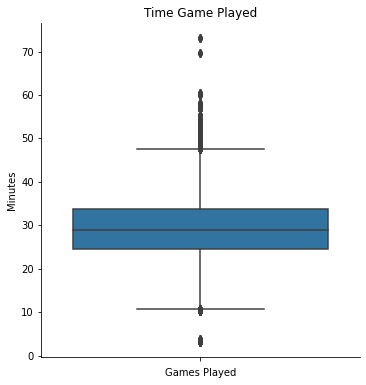

In [29]:
plot1= sns.catplot(y='minPlayed',kind='box',data=df)
plt.title('Time Game Played')
plt.ylabel('Minutes')
plt.xlabel('Games Played')



From the boxplot , the mean of the time of a game is around 29 mins. 
25% of games ends around at the 25 min mark.
75% of games ends around at the 34 min mark.

Text(0.5, 6.800000000000011, 'Win')

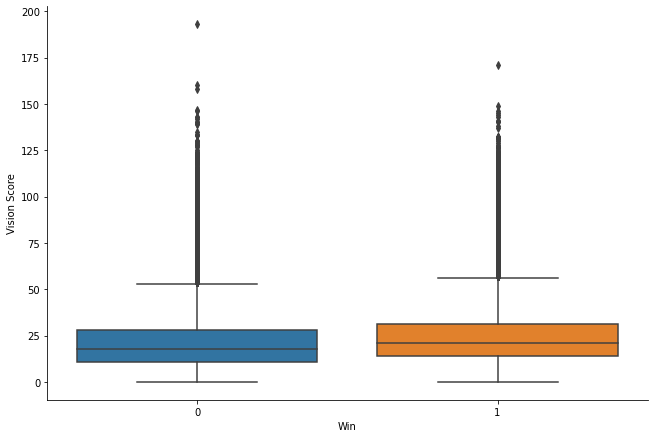

In [30]:
plot2 = sns.catplot(x='win',y='visionScore',kind='box',data=df,height=6,aspect=1.5)
plt.ylabel('Vision Score')
plt.xlabel('Win')

The mean of vision score for team who won the game is slightly bit higher than team that lost the game. 
Win condition is not impacted by Vision Score.

In [42]:
df2 = df[['deaths','goldEarned','goldSpent','kills','totalDamageDealtToChampions','visionScore','win']]
df2.head()

,deaths,goldEarned,goldSpent,kills,totalDamageDealtToChampions,visionScore,win
1,6,14062,11650,15,23814,10,1
2,4,10577,9500,4,15748,21,1
3,5,13858,11650,18,30404,8,1
4,6,9292,8525,5,10578,3,1
5,1,8284,7860,1,7945,68,1


In [44]:
corr = df2.corr(method='pearson').replace({1.0:None})
corr

,deaths,goldEarned,goldSpent,kills,totalDamageDealtToChampions,visionScore,win
deaths,None,0.28146,0.340282,0.101128,0.326282,0.167363,-0.375789
goldEarned,0.28146,None,0.96769,0.79455,0.853091,0.188864,0.239781
goldSpent,0.340282,0.96769,None,0.748087,0.832025,0.183362,0.145424
kills,0.101128,0.79455,0.748087,None,0.768169,-0.00795,0.26426
totalDamageDealtToChampions,0.326282,0.853091,0.832025,0.768169,None,0.137632,0.134768
visionScore,0.167363,0.188864,0.183362,-0.00795,0.137632,None,0.086205
win,-0.375789,0.239781,0.145424,0.26426,0.134768,0.086205,None


In terms  of 'win', kills have the highest correlation. More kills = more likely to win if compared to totalDamageDealtToChampions or goldEarned